<a href="https://colab.research.google.com/github/buceleasebastian/GAN/blob/main/DCGAN_CelebA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [292]:
#Importing modules
import matplotlib.pyplot as plt
import torch
import random
import torchvision
import torchvision.utils as utils
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib as plt
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.nn.modules.batchnorm import BatchNorm2d
from torch.nn.modules.conv import ConvTranspose2d


In [293]:
"""Generator and Discriminator hyperparameters

Parameters taken as arguments in the initialization of the Generator and Discriminator Network

Parameters

----------
n_channels : number of channels of the image, corresponds to the number of channel of the input for the discriminator and the output for the generator - set to 3 for an RGB image
size_latent : size of the latent noise vector taken as input for the Generator
disc_features : size of the feature maps passed as input for the discriminator
gen_features : size of feature maps (images obtained after applying the convolution) in the generator
transforms : Pytorch normalization of images 
----------

References 

----------

  [1^]  [Radford A., Metz L. Chintala S. (2016) : Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks] (https://arxiv.org/abs/1511.06434)
  [2^]  [Inkawich, N - DCGAN Tutorial] (https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)

"""


#device initialization
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

#Number of channels of the training images
n_channels = 3

#Size of the latent vector
size_latent = 100

#Discriminator feature maps size
disc_features = 64

#Generator feature maps size
gen_features = 64

#Image size 
image_size = 64


In [294]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
my_path = '/Deep_Learning_Project/img_align_celeba'
gdrive_path = "/content/drive" + "/My Drive" + my_path

Mounted at /content/drive


In [295]:
! ls /content/drive/MyDrive/Deep_Learning_Project/img_align_celeba

 000001.jpg   007905.jpg   015809.jpg	     023214.jpg        031117.jpg
 000002.jpg   007906.jpg   015810.jpg	    '023215 (1).jpg'   031118.jpg
 000003.jpg   007907.jpg   015811.jpg	     023215.jpg        031119.jpg
 000004.jpg   007908.jpg   015812.jpg	     023216.jpg        031120.jpg
 000005.jpg   007909.jpg   015813.jpg	     023217.jpg        031121.jpg
 000006.jpg   007910.jpg   015814.jpg	     023218.jpg        031122.jpg
 000007.jpg   007911.jpg   015815.jpg	     023219.jpg        031123.jpg
 000008.jpg   007912.jpg   015816.jpg	     023220.jpg        031124.jpg
 000009.jpg   007913.jpg   015817.jpg	     023221.jpg        031125.jpg
 000010.jpg   007914.jpg   015818.jpg	     023222.jpg        031126.jpg
 000011.jpg   007915.jpg   015819.jpg	     023223.jpg        031127.jpg
 000012.jpg   007916.jpg   015820.jpg	     023224.jpg        031128.jpg
 000013.jpg   007917.jpg   015821.jpg	     023225.jpg        031129.jpg
 000014.jpg   007918.jpg   015822.jpg	     023226.jpg        031

In [296]:
! cp -r /content/drive/MyDrive/Deep_Learning_Project/img_align_celeba.zip .

In [297]:
! unzip img_align_celeba.zip

Archive:  img_align_celeba.zip
replace img_align_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [298]:
! mkdir celeba
! mv img_align_celeba celeba

mkdir: cannot create directory ‘celeba’: File exists
mv: cannot move 'img_align_celeba' to 'celeba/img_align_celeba': Directory not empty


In [299]:
! mv img_align_celeba celeba

mv: cannot move 'img_align_celeba' to 'celeba/img_align_celeba': Directory not empty


#Deep Convolutional Generative Adversarial Networks

#Data Loading

In [300]:
#Charing the datset : 
data = datasets.ImageFolder(root="/content/celeba", transform=ToTensor())


In [301]:
#Attributing dataset to 
dataloader = DataLoader(data, batch_size=64, shuffle=True, num_workers=2)

#Parameter Initialization

##Image hyperparameters

##Optimization parameters

In [318]:
"""Optimization hyperparameters

Parameters taken as arguments during training 

Parameters

----------
batch_size : number of samples that 
lr : learning rate, dictates the pace at which the networks update the values of parameter estimates
beta : 
----------

References 

----------

[1^]  [Radford A., Metz L. Chintala S. (2016) : Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks] (https://arxiv.org/abs/1511.06434)
[2^]  [Inkawich, N - DCGAN Tutorial] (https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)


"""
#Batch size
batch_size = 64

#Adam optimizer learning rate
lr = 0.0002

#Adam optimizer hyperparameters
beta1 = 0.5
beta2 = 0.9999

#Number of training epochs
epochs = 1

#Data description

##Plotting some images from the datase

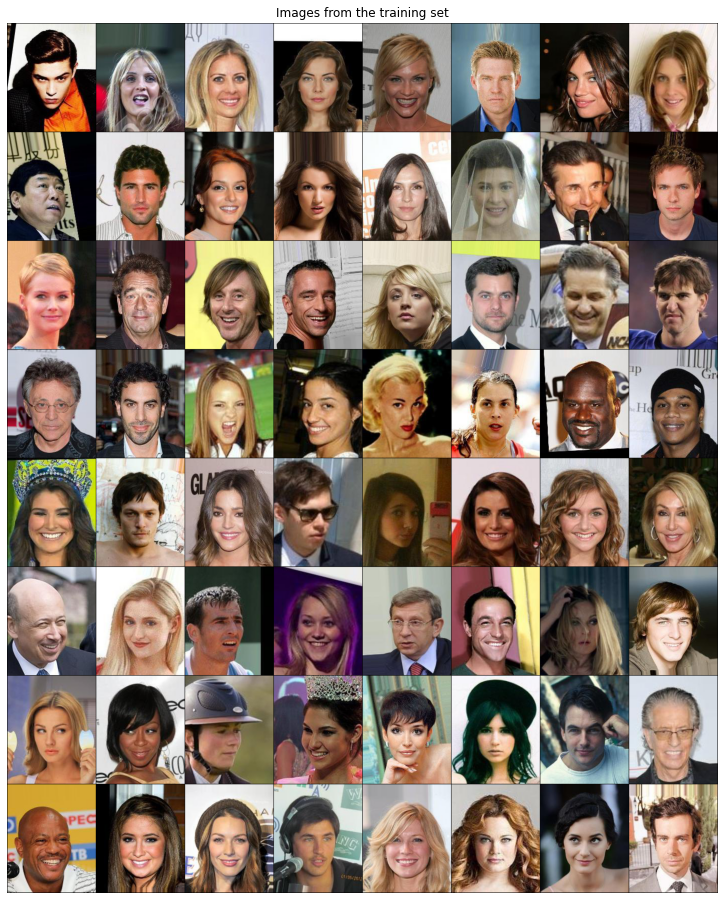

In [303]:
batch = next(iter(dataloader))
plt.figure(figsize = (16,16))
plt.axis("off")
plt.title("Images from the training set")
plt.imshow(np.transpose(utils.make_grid(batch[0].to(device)[:64], padding = 1, normalize = True).cpu(),(1,2,0)))

#Generator and Discriminator

##Generator

In [304]:
class Generator(nn.Module):

  """Generator class Network
  
  Class inherits from pytorch Neural Network Module
  We are taking the noise vector and then we are passing 2D Transposed Convolutional layers, that are paired with Batch Normalization Layers and a ReLU activation function.
  Class is composed by the __init__ function for initialization and a function __layers which corresponds to a block of a Convolutional 2D layer, a Batch Normalization Layer 
  and the ReLU activation function.

  Parameters

  ----------
  latent_dim : dimension of the latent noise vector
  channels : number of channels of the output image
  gen_features : size of feature maps (images obtained after applying the convolution) in the generator 
  ----------

  References 

  ----------

  [1^]  [Radford A., Metz L. Chintala S. (2016) : Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks] (https://arxiv.org/abs/1511.06434)
  [2^]  [DCGAN Repository] (https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/GANs/2.%20DCGAN/model.py)

  """

  def __init__(self, latent_dim, channels, gen_features): 
    super(Generator, self).__init__()
    self.gen = nn.Sequential(
       #Convolution of input Z
       self._layers(latent_dim, gen_features*16, 4, 1, 0),
      
       #Dimension gen_features*4 x 8 x 8
       self._layers(gen_features*16, gen_features*8, 4, 2, 1),

       #Dimension gen_features*2 x 16 x 16
       self._layers(gen_features*8, gen_features*4, 4, 2, 1),

       #Dimension gen_features*2 x 32 x 32
       self._layers(gen_features*4, gen_features*2, 4, 2, 0),


       #Dimension gen_features x 64 x 64
       nn.ConvTranspose2d(gen_features*2, 
                         channels, 
                         kernel_size = 4, 
                         stride = 2, 
                         padding = 1
                          ),
      nn.Tanh()
      )
 
  #Creation of block of layers : Transposed Convolution, Batch Normalization, ReLU 
  def _layers(self, channels_input, channels_output, kernel_size, stride, padding): 
      return nn.Sequential(
          nn.ConvTranspose2d(channels_input, 
                             channels_output,
                             kernel_size,
                             stride, 
                             padding, 
                             bias = False),
          nn.BatchNorm2d(channels_output),
          nn.ReLU(),
      )


  def forward(self, x):
     return self.gen(x)

##Discriminator

In [305]:
class Discriminator(nn.Module):

  """Discriminator Class Network

  Class inherits from pytorch Neural Network Module
  Takes an image as input and outputs the probability that the image is real by applying a series of Convolutional 2D, Batch Normalization and LeakyReLU layers using function _layers.
  Output is generated through a sigmoid function.

  Parameters

  ----------  
  channels : number of channels in the initial image
  disc_features : number of channels that are going to change as we are passing through the discriminator
  ----------

  References 

  ----------

  [1^]  [Radford A., Metz L. Chintala S. (2016) : Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks] (https://arxiv.org/abs/1511.06434)
  [2^]  [DCGAN Repository] (https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/GANs/2.%20DCGAN/model.py)

  """

  def __init__(self, channels, disc_features):
    super(Discriminator, self).__init__()
    self.disc = nn.Sequential(
        #Input : N x channels x 64 x 64
        nn.Conv2d(
            channels, 
            disc_features, 
            kernel_size = 4, 
            stride = 2, 
            padding = 1
        ),
        nn.LeakyReLU(0.2),
        
        #Dimension disc_features x 16 x 16
        self._layers(disc_features, disc_features*2, 4, 2, 1),

        #Dimension disc_features x 8 x 8
        self._layers(disc_features*2, disc_features*4, 4, 2, 1),

        #Dimension disc_features x 4 x 4
        self._layers(disc_features*4, disc_features*8, 4, 2, 1),

        
        #Dimension disc_feature x 2 x 2
        nn.Conv2d(disc_features*8, 1, 4, 2, 0),
        nn.Sigmoid()
    )
   
    #Creation of block of layers : convolution, normalization, LeakyReLU
  def _layers(self, channels_input, channels_output, kernel_size, stride, padding):
       return nn.Sequential(
         nn.Conv2d(
            channels_input,
            channels_output,
            kernel_size,
            stride,
            padding,
            bias = False
        ),
        nn.BatchNorm2d(channels_output),
        nn.LeakyReLU(0.2)
    )

  
  def forward(self, x):
      return self.disc(x)

##Weights initialization

In [306]:

def weights_initialization(model):

  """Weights initialization function

  Takes model as input and initializes the weights in each of its layer
  Initialization of Normally distributed weights with mean 0 and standard deviation 0.2

  Parameters

  ----------  
  model : Generator or discriminator, taken as input
  ----------

  References 

  ----------

  [1^]  [Radford A., Metz L. Chintala S. (2016) : Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks] (https://arxiv.org/abs/1511.06434)
  [2^]  [DCGAN Repository] (https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/GANs/2.%20DCGAN/model.py)


  """
  for module in model.modules():
    if module == nn.Conv2d or module == nn.ConvTranspose2d or module == nn.BatchNorm2d :
      nn.init.normal_(model.weight.data, 0.0, 0.02)

##Training setup

##Training Loop

In [321]:
"""Training Loop

Initialization of Generator and Discriminator, initialization of their weights and optimizers
Initialization of Binary Cross-Entropy as loss function
Initialization of empty lists of losses


References 

----------

[1^]  [Radford A., Metz L. Chintala S. (2016) : Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks] (https://arxiv.org/abs/1511.06434)
[2^]  [Inkawich, N - DCGAN Tutorial] (https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)

"""



#Networks initialization with given hyperparameters
disc = Discriminator(n_channels, disc_features).to(device)
gen = Generator(size_latent, n_channels, gen_features).to(device)

#Weights initialization with mean 0 and sd 0.2
weights_initialization(disc)
weights_initialization(gen)

#Adam optimizers initialization for Discriminator and Generator with beta velus corresponding to the paper
gen_optimizer = optim.Adam(gen.parameters(), lr = lr, betas = (beta1, beta2))
disc_optimizer = optim.Adam(disc.parameters(), lr = lr, betas = (beta1, beta2))

#Binary Cross-Entropy loss criterion
criterion = nn.BCELoss()

#Training step
step = 0

#Initial noise vector initialization for further comparison
init_noise = torch.randn(64, size_latent, 1, 1).to(device)

gen.train()
disc.train()

#List of losses
D_losses = []
G_losses = []
img_list = []

#Training Loop
for epoch in range(epochs):
  for batch, (real_image, target) in enumerate(dataloader):
    print("Batch number " + str(batch))
    
    #Uploading real image to gpu
    real_image = real_image.to(device)

    #Generating noise vectors
    noise = torch.randn((batch_size, size_latent, 1, 1)).to(device)
    
    #Generating fake image from noise
    fake = gen(noise)

    #Train discriminator

    #Discriminator on real image
    disc_real = disc(real_image).reshape(-1)
    loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))


    #Discriminator on fake image
    disc_fake = disc(fake).reshape(-1)
    loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
    disc_loss = (loss_disc_real + loss_disc_fake)
    D_losses.append(disc_loss.item())
    print("Discriminator Loss :" + str(disc_loss))

    #Discriminator loss optimization
    disc_loss.requires_grad = True
    disc_loss.retain_grad()
    disc.zero_grad()
    disc_loss.backward(retain_graph = True)
    disc_optimizer.step()


    #Train generator

    #Discriminate fake and get loss
    output = disc(fake).reshape(-1)
    generator_loss = criterion(output, torch.ones_like(output))
    G_losses.append(generator_loss.item())
    print("Generator Loss :" + str(generator_loss))

    #Generator Adam optimization
    generator_loss.requires_grad = True
    generator_loss.retain_grad()
    gen.zero_grad()
    generator_loss.backward()
    gen_optimizer.step()

    if step % 100 == 0 or ((epoch == epochs-1) and (batch == len(dataloader)-1)):

      with torch.no_grad():
        fake = gen(init_noise).detach().cpu()
      img_list.append(utils.make_grid(fake, normalize = True))
    step = step + 1


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffafeba2ca0><function _MultiProcessingDataLoaderIter.__del__ at 0x7ffafeba2ca0>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()self._shutdown_workers()

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a c

Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
Discriminator Loss :tensor(1.3723, device='cuda:0')
Generator Loss :tensor(0.8237, device='cuda:0')
Batch number 1500
Discriminator Loss :tensor(1.3291, device='cuda:0')
Generator Loss :tensor(0.8464, device='cuda:0')
Batch number 1501
Discriminator Loss :tensor(1.3929, device='cuda:0')
Generator Loss :tensor(0.7908, device='cuda:0')
Batch number 1502
Discriminator Loss :tensor(1.3484, device='cuda:0')
Generator Loss :tensor(0.8411, device='cuda:0')
Batch number 1503
Discriminator Loss :tensor(1.3818, device='cuda:0')
Generator Loss :tensor(0.8145, device='cuda:0')
Batch number 1504
Discriminator Loss :tensor(1.3841, device='cuda:0')
Generator Loss :tensor(0.7962, device='cuda:0')
Batch number 1505
Discriminator Loss :tensor(1.3432, device='cuda:0')
Generator Loss :tensor(0.8470, device='cuda:0')
Batch number 1506
Discriminator Loss :tensor(1.3825, device='cuda:0')
Generator Loss :tensor(0.7989, device='cuda:0')
Batc

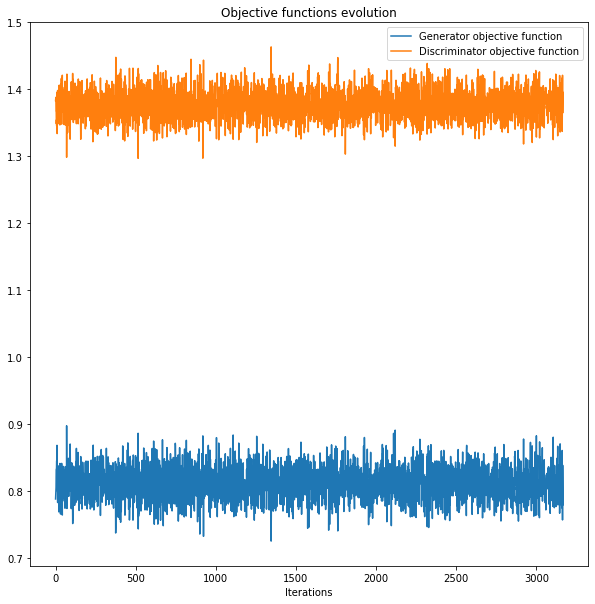

In [322]:
"""Plot of objective functions

Loss function should be decreasing for the Discriminator, while the objective function should be increasing

References 

----------

[1^]  [Inkawich, N - DCGAN Tutorial] (https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)

"""

#Graph of objective functions
plt.figure(figsize = (10,10))
plt.title("Objective functions evolution")
plt.plot(G_losses, label = "Generator objective function")
plt.plot(D_losses, label = "Discriminator objective function")
plt.xlabel("Iterations")
plt.legend()
plt.show()

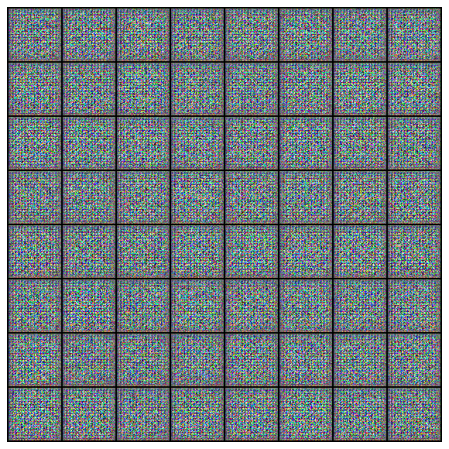

In [323]:
"""Plot of obtained images throught imshow


References 

----------

[1^]  [Inkawich, N - DCGAN Tutorial] (https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)

"""

fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]

# WGAN training

In [ ]:
"""Wasserstein GAN

References 

----------

[1^] [Arjovsky M., Chintala S., Bottou L., (2017): Wasserstein GAN] (https://arxiv.org/abs/1701.07875)
[2^] [WGAN Repository] (https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/GANs/3.%20WGAN/train.py)

"""

#Hyperparameters for training setup
lr = 0.0005
batch_size = 64
latent_dim = 100
epochs = 5

#Additional hyperparameters for WGAN
disc_iterations = 5
weight_clip = 0.01

#Optimizers for WGAN
gen_optimizer = optim.RMSprop(gen.parameters(), lr = lr)
disc_optimizer = optim.RMSprop(disc.parameters(), lr = lr)

G_losses = []
D_losses = []
img_list = []
 

#Training Loop
for epoch in range(epochs):
  for batch, (real_image, _) in enumerate(dataloader):
    print("Batch number " + str(batch))
    
    #Uploading real image to gpu
    real_image = real_image.to(device)

    for _ in range(disc_iterations):
      #Generating noise vectors
      noise = torch.randn((batch_size, size_latent, 1, 1)).to(device)
    
      #Generating fake image from noise
      fake = gen(noise)

      #Train discriminator


      #Discriminator on real image
      disc_real = disc(real_image).reshape(-1)
      loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))

      #Discriminator on fake image
      disc_fake = disc(fake).reshape(-1)

      #Loss of discriminator
      loss_disc = -loss_disc_real + loss_disc_fake
      D_losses.append(loss_disc.item())

      #Discriminator Adam optimization
      disc_loss.requires_grad = True
      disc.zero_grad()
      disc_loss.backward(retain_graph = True)
      disc_optimizer.step()

      for parameter in disc.parameters():
        parameter.data.clamp_(-weight_clip, weight_clip)

      #Train generator

      #Discriminate fake and get loss
      output = disc(fake).reshape(-1)
      generator_loss = criterion(output, torch.ones_like(output))
      print("Generator Loss :" + str(generator_loss))
      G_losses.append(generator_loss.item())

      #Generator Adam optimization
      generator_loss.requires_grad = True
      gen.zero_grad()
      generator_loss.backward()
      gen_optimizer.step()

      if batch % 100 == 0:

        with torch.no_grad():
          fake = gen(init_noise).detach().cpu()
          img_list.append(utils.make_grid(fake, padding = 2, normalize = True))
      step = step + 1


In [ ]:
"""Plot of obtained images throught imshow


References 

----------

[1^]  [Inkawich, N - DCGAN Tutorial] (https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)

"""

fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]